<a href="https://colab.research.google.com/github/elaysason/ANALYSIS-SP500/blob/main/HW0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
input_size = 784  #28*28
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [ ]:
# MNIST Dataset (Images and Labels)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.3081,],
                                                     std=[0.1306,])])

train_dataset = dsets.MNIST(root='./data', train=True, transform=transform,
                            download=True)

test_dataset = dsets.MNIST(root='./data', train=False, transform=transform)

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [ ]:
#normalizing the data
train_set = torchvision.datasets.MNIST(root='./data',train=True,download=True,
                                               transform=transforms.ToTensor())

In [ ]:
def newsoftmax(x):
  max = torch.max(x, 1, keepdim=True)[0]
  x_exp = torch.exp(x-max)
  x_exp_sum = torch.sum(x_exp, 1, keepdim=True)
  return x_exp/x_exp_sum

In [ ]:
def relu(out):
  zeros_vec = torch.zeros(out.shape)
  return torch.maximum(out,zeros_vec)

In [ ]:
#define the model
class TwoLayers(nn.Module):
    def __init__(self, input_size, output_size):
        super(TwoLayers, self).__init__()
        self.linear1 = nn.Linear(input_size, 100)  
        self.linear2 = nn.Linear(100, output_size) 
        
    def forward(self, x):
        out = self.linear1(x)
        out = relu(out)    
        out = self.linear2(out)
        return newsoftmax(out)

In [ ]:
def Cross_entropy_loss(outputs, labels):
    total_sum = 0
    for i,label in enumerate(labels):
      cur_disb = outputs[i]
      total_sum += label*cur_disb[label]
    return total_sum *-1/len(labels)

In [ ]:
model = TwoLayers(input_size, num_classes)
ce_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
acc = []
for epoch in range(num_epochs):
  correct = 0.0
  total = 0
  for i, (images, labels) in enumerate(train_loader):
      images = images.view(-1, 28*28)        
      optimizer.zero_grad()
      outputs = model(images)
      predicted = torch.argmax(outputs, 1)
      loss = Cross_entropy_loss(outputs, labels)
      loss.backward()
      optimizer.step()

      if i % 100 == 0:
         print ('Epoch: [{}/{}], Step: [{}/{}], Loss: {:.4}'.format(epoch+1,
                              num_epochs,i+1, len(train_dataset)//batch_size,
                                                                  loss.item())) 
      total += labels.size(0)
      correct += (predicted == labels).sum()
  acc.append(correct / total)
         

Epoch: [1/5], Step: [1/600], Loss: 386.0
Epoch: [1/5], Step: [101/600], Loss: 108.5
Epoch: [1/5], Step: [201/600], Loss: 101.4
Epoch: [1/5], Step: [301/600], Loss: 94.43
Epoch: [1/5], Step: [401/600], Loss: 113.8
Epoch: [1/5], Step: [501/600], Loss: 111.0
Epoch: [2/5], Step: [1/600], Loss: 96.48
Epoch: [2/5], Step: [101/600], Loss: 93.03
Epoch: [2/5], Step: [201/600], Loss: 111.9
Epoch: [2/5], Step: [301/600], Loss: 96.07
Epoch: [2/5], Step: [401/600], Loss: 102.5
Epoch: [2/5], Step: [501/600], Loss: 96.48
Epoch: [3/5], Step: [1/600], Loss: 104.8
Epoch: [3/5], Step: [101/600], Loss: 106.6
Epoch: [3/5], Step: [201/600], Loss: 111.7
Epoch: [3/5], Step: [301/600], Loss: 101.3
Epoch: [3/5], Step: [401/600], Loss: 105.5
Epoch: [3/5], Step: [501/600], Loss: 110.1
Epoch: [4/5], Step: [1/600], Loss: 95.33
Epoch: [4/5], Step: [101/600], Loss: 93.72
Epoch: [4/5], Step: [201/600], Loss: 108.0
Epoch: [4/5], Step: [301/600], Loss: 99.47
Epoch: [4/5], Step: [401/600], Loss: 113.1
Epoch: [4/5], Step:

In [ ]:
acc_test = []
for epoch in range(num_epochs):
  correct = 0
  total = 0
  for images, labels in test_loader:
      images = images.view(-1, 28*28)
      outputs = model(images)
      predicted = torch.argmax(outputs, 1)
      
      total += labels.size(0)
      correct += (predicted == labels).sum()

  print('Accuracy of the model on the 10000 test images: ', float(correct) / total)
  acc_test.append(float(correct) / total)
#Save the Model
torch.save(model.state_dict(), 'model.pkl')

Accuracy of the model on the 10000 test images:  0.7492
Accuracy of the model on the 10000 test images:  0.7492
Accuracy of the model on the 10000 test images:  0.7492
Accuracy of the model on the 10000 test images:  0.7492
Accuracy of the model on the 10000 test images:  0.7492


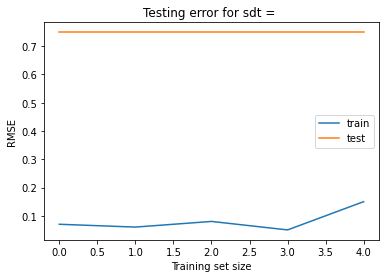

In [ ]:
plt.plot(np.arange(num_epochs), acc, label = "train")
plt.plot(np.arange(num_epochs), acc_test, label = "test")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.title("Testing error for sdt = ")
plt.show()